<a href="https://colab.research.google.com/github/LadyPary/Performance-Comparison-of-CPU-Scheduling-Algorithms/blob/main/CPU_Scheduling_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **<center> Statistical Study of CPU Scheduling Algorithms  </center>**
# <center> <img src="https://raw.githubusercontent.com/LadyPary/Performance-Comparison-of-CPU-Scheduling-Algorithms/main/Pictures/title.jpeg" width="500"/>

##### <center>Zahra Rabbany Khorasgani</center>
<center>610398124</center>
<center>parisa.rabbany.pr@gmail.com</center>

##### <center>Department of Computer Science, Tehran University</center>
##### <center> Operating Systems </center>
##### <center> Prof. Alireza Khalilian </center>
##### <center>Feb. 11, 2022</center>
---




## **🔖 Table of Contents**
1. Abstract

2. Introduction

3. CPU Scheduling Algorithms 

  3.1. First Come First Serve (FCFS)

	3.2. Shortest Job First (SJF)

	3.3. Shortest Remaining Time First (SRTF)

	3.4. Priority Scheduling (PRI)

	3.5. Round Robin Scheduling (RR)

	3.6. Multiple-Level Queues Scheduling

4. Random Number Generator Algorithm

	4.1. Random Number Generator/ Linear Congruential Generator

	4.2. Runs Test of Randomness

5. Simulations and Results

6. Comparison Plots and Results Interpretation

7. UI / Try It Yourself! 🤓

8. Conclusion

9. Refrences
---

## <center> **1. Abstract**



***CPU Scheduling*** is a process of determining which process will own CPU for execution while another process is on hold. The main task of CPU scheduling is to make sure that whenever the CPU remains idle, the OS at least select one of the processes available in the ready queue for execution. 

In this project, we first **introduce** 5 different algorithms for CPU Scheduling and then **implement FCFS with different arrival times**  and **examine** its performance using randomly generated numbers. In the end, you can set arbitary parameters and see the outputs and plots and compare them yourself! 

---

## <center>**2. Introduction**


CPU Scheduling is a process of determining which process will own CPU for execution while another process is on hold. The main task of CPU scheduling is to make sure that whenever the CPU remains idle, the OS at least select one of the processes available in the ready queue for execution. The selection process will be carried out by the CPU scheduler. It selects one of the processes in memory that are ready for execution.

---

#### **Types of CPU Scheduling:**

1.   **Preemptive Scheduling:** The tasks are mostly assigned with their priorities. Sometimes it is important to run a task with a higher priority before another lower priority task, even if the lower priority task is still running. The lower priority task holds for some time and resumes when the higher priority task finishes its execution.

2.   **Non-Preemptive Scheduling:** The CPU has been allocated to a specific process. The process that keeps the CPU busy will release the CPU either by switching context or terminating. It is the only method that can be used for various hardware platforms. That’s because it doesn’t need special hardware (for example, a timer) like preemptive scheduling.

---

####**Important CPU scheduling Terminologies:**

* **Burst Time/Execution Time**: Time required by the process to complete execution. It is also called running time.

* **Arrival Time:** When a process enters in a ready state.

* **Exit Time:** When process completes and exits from a system.

* **Multiprogramming:** A number of programs which can be present in memory at the same time.

* **Jobs:** Type of program without any kind of user interaction.

* **User:** Kind of program having user interaction.

* **Process:** It is the reference that is used for both job and user.

* **CPU/IO burst cycle:** Characterizes process execution, which alternates between CPU and I/O activity. CPU times are usually shorter than the time of I/O.

---

####**CPU Scheduling Criteria:**
 <center> <img src="https://raw.githubusercontent.com/LadyPary/Performance-Comparison-of-CPU-Scheduling-Algorithms/main/Pictures/diagram-1.png" width="500"/> </center> 


* **CPU Utilization:** Percentage of time that the CPU is doing useful work (i.e. not idling). 100% is perfect.

* **Throughput:** Number of processes completed / time unit.

* **Wait time:** Average time a process spends in the run (or ready) queue.

* **Response Time:** Average time elapsed from when process is 
submitted until useful output is obtained.

* **Turnaround Time:** Average time elapsed from when process is submitted to when it has completed. It is the calculation of the total time spent waiting to get into the memory, waiting in the queue and, executing on the CPU. The period between the time of process submission to the completion time is the turnaround time.

Typically, Utilization and Throughput are traded off for **better Response Time**. Response time is important for OS’s that aim to be **user-friendly**. In general, we would like to optimize the average measure. It might be a good idea to minimize the maximum response time.

---

####**Types of CPU scheduling Algorithm:**
 <center> <img src="https://raw.githubusercontent.com/LadyPary/Performance-Comparison-of-CPU-Scheduling-Algorithms/main/Pictures/diagram-2.png" width="550"/> </center> 

I explain each algorithm in the next section.

---
## <center>**3. CPU Scheduling Algorithms**



### First we import the necessary packages.

In [ ]:
#Necessary packages

# For computations
from statistics import mean, median
import random
import pandas as pd
import numpy as np
import math
from scipy import stats

# For visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For time litmit
import time

### Then we code some functions to calculate useful informations.

These functions are:

* Calculation Functions:

 * calculateExitTime:
   * If the new process arrives when cpu is free then we have: 
   current process exit time = current process arrival time + current process burst time
   * If the new process arrives when cpu is busy then we have: 
   current process exit time = previous process exit time + current process burst time

 * calculateWaitingTime:
   * current waiting time = current turnaround time - current burst time

 * calculateTurnAroundTime:
   * current turnaround time = current exit time - current arrival time

 * calculateCPUutilization:
   * Calculates $\frac{working\ time}{total\ time}*100$
   * So CPU utilization might not be $100%$ when there are delays in arrival of new processes.

 * calculateSuccessRate:
   * Calculates $\frac{successful}{failed\ +\ successful}*100$
   * Shows how many samples were successfully calculated within the time and iteration limits.

 * average:
   * Computes the average.
---

* Visualisation Functions:

  * printSampleResults:
   * Prints *CPU Utilization* for each sample.
   * Prints *Average Turnaround* Time for each sample.
   * Prints *Average Waiting Time* for each sample.
   * Prints *Throughput* for each sample.
   * Prints *Average Reponse Time* for each sample.
   * Prints *Total Time* for each sample.
   * Prints *Average Arrival Time* for each sample.
   * Prints *Average Burst Time* for each sample.

  * printSimulationResults:
   * Prints the results of the the simulation.
   * Prints statistical characteristics of the simulations samples.
   * Displays Pearson correlation coefficient table. 
   * Displays correlogram of each result vs parameter.
   * Displays scatter plots and fits of each result vs parameter.

  * compareAlgoritms:
    * Takes $x$ and $y$ then draws the scatter plot for them and then fits a curve using local regression with $frac=0.1$

---

* Other Functions:

 * timeOverflow:
   * Returns true if the time this sample is taking is longer than the time limit.
   
 * iterationsOverflow:
   * Returns true if the iterations this sample is taking is more than the iterations limit.

In [ ]:
#Common Functions

def calculateExitTime(processes):
  """ 
  Calculates the exit times
    Input:
      processes -> dictionary {P_id: [arrival_time, burst_time]}
    Output: 
      iterations -> int 
      exit_times -> List of exit times
  """
  n = len(processes)

  # for the first process: exit time = burst time
  keys = list(processes.keys())
  exit_times = [ processes[keys[0]][1] ]

  for i in range(1, n):
    if (processes[keys[i]][0] > exit_times[i-1]):
      # new process arrives when cpu is free:
      # current process exit time = current process arrival time + 
      #                             current process burst time
      exit_times.append(processes[keys[i]][0] + processes[keys[i]][1])
    
    else:
      # new process arrives when cpu is busy:
      # current process exit time = previous process exit time + 
      #                             current process burst time
      exit_times.append(exit_times[i-1] + processes[keys[i]][1])
    
  return n, exit_times

def calculateWaitingTime(processes, tat):
  """ 
  Function to calculate the waiting time
    Inputs:
      processes -> dictionary {P_id: [arrival_time, burst_time]}
      tat -> list of turnaround times
    Output: 
      iterations -> int 
      wt-> List of waiting times
  """
  n = len(processes)
  keys = list(processes.keys())
  wt = []
  for i in range(0, n):
    # current waiting time = current turnaround time - current burst time
    wait = tat[i] - processes[keys[i]][1]
    if wait>0:
      wt.append(wait)
    else:
      wt.append(0)

  return n, wt
     
def calculateTurnAroundTime(processes, et):
  """ 
  Function to find the calculate turnaround times
    Inputs:
      processes -> dictionary {P_id: [arrival_time, burst_time]}
      et -> list of exit times
    Output: 
      iterations -> int 
      tat-> List of turnaround times
  """
  n = len(processes)
  keys = list(processes.keys())
  tat = []
  for i in range(0, n):
    # current turnaround time = current exit time - current arrival time
    tat.append(et[i] - processes[keys[i]][0])
  return n, tat

def calculateCPUutilization(processes, total_time):
  """ 
  calculates CPU utilization
    Inputs:
      processes -> dictionary {P_id: [arrival_time, burst_time]}
      total_time -> int
    Output: 
      CPUutilization-> percentage
  """
  workingtime = 0
  n = len(processes)
  keys = list(processes.keys())
  for i in range(n):
    workingtime += processes[keys[i]][1]
  return (workingtime/total_time)*100

def average(list):
  return mean(list)

def compareAlgoritms(df, x, y):
  fig = px.scatter(df.sort_values(x),x=x,y=y,
                   trendline="lowess", trendline_options=dict(frac=0.1), trendline_color_override="red",
                   width=600, height=300)
  fig.update_traces(showlegend=True) #trendlines have showlegend=False by default

  fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue")
  
  fig.show()
 
def timeOverflow(time_limit, total_time):
  if time_limit<total_time:
    return True
  else:
    return False

def iterationsOverflow(iterations_limit, total_iterations):
  if iterations_limit<total_iterations:
    return True
  else:
    return False

def calculateSuccessRate(failed, successful):
  return (successful/(failed+successful))*100


def printSampleResults(results):
  df, CPUutilization, average_TAT, average_WT, throughput, average_RT, total_time, average_at, average_bt = results
  
  display(df)
  print("____________________________________________________________________________")

  print("CPU Utilization: ",CPUutilization)
  print("Average Turnaround Time: ",average_TAT)
  print("Average Waiting Time: ",average_WT)
  print("Throughput: ", throughput)
  print("Average Reponse Time: ",average_RT)
  print("Total Time: ", total_time)
  print("Average Arrival Time: ",average_at)
  print("Average Burst Time: ", average_bt)

def printSimulationResults(results):

  print("Results of the simulation:")
  display(results)
  print("======================================================================================")

  print("Statistical characteristics of the simulations samples:")
  display(results.describe())
  print("======================================================================================")

  print("Pearson correlation coefficient:")
  print(display(results.corr()))
  print("======================================================================================")

  print("Correlogram:")
  # Basic correlogram
  sns.pairplot(results, 
               y_vars=["CPU Utilization",	"Avg Turnaround Time","Avg Waiting Time",	"Throughput",	"Avg Reponse Time",	"Total Time"], 
               x_vars=["Avg Arrival Time",	"Avg Burst Time"])
  plt.show()
  print("======================================================================================")

  print("Scatter Plots and fits:")
  for item in ["CPU Utilization",	"Avg Turnaround Time","Avg Waiting Time",	"Throughput",	"Avg Reponse Time",	"Total Time"]:
    compareAlgoritms(results, "Avg Burst Time", item)
  for item in ["CPU Utilization",	"Avg Turnaround Time","Avg Waiting Time",	"Throughput",	"Avg Reponse Time",	"Total Time"]:
    compareAlgoritms(results, "Avg Arrival Time", item)

### **3.1. First Come First Serve (FCFS)**
***with different arrival times***

**First Come First Serve (FCFS)** is an operating system scheduling algorithm that automatically executes queued requests and processes in **order of their arrival**. In this type of algorithm, processes which requests the CPU first get the CPU allocation first.
As the process enters the ready queue, its PCB (Process Control Block) is linked with the tail of the queue and, when the CPU becomes free, it should be assigned to the process at the beginning of the queue.

----

#### **Function's name:** FCFS 

*(Please note that the variables and functions below have already been defined in previous sections.)*

##### **Inputs:** 
* **n** = Number of **processes**,
* **at** = List of **arrival** times,
* **bt** = List of **burst** times,
* **timeLimit** = maximum amount of **time** that the algorithm on this sample is allowed to run, 
* **iterationsLimit** = maximum amount of **iterations** that the algorithm on this sample is allowed to run.

##### **Outpus:**  
* **df** = A table of **processes in order** which they go into the CPU with their attributes,
* **CPUutilization** = $\frac{working\ time}{total\ time}*100$,
* **average(TAT)** = Average **turnaround** time,
* **average(WT)** = Average **waiting** time,
* **throughput** = $\frac{Number\ of\ processes}{total\ time}$
* **average(RT)** = Average **response** time, 
* **total_time** = **Total time** that the algorithm spends on this sample, 
* **average(at)** = Average **arrival** time, 
* **average(bt)** = Average **burst** time.

##### **Steps:**
1. Sort the processes in increasing order of arrival time.
2. Calculate the exit times using *calculateExitTime* function. 
3. Calculate the turnaround times using *calculateTurnAroundTime* function. 
4. Calculate the waiting times using *calculateWaitingTime* function. 
5. Set: 
  * Response Time = Waiting Time
  * Total Time = Last process's exit time
  * Throughput = $\frac{Number\ of\ processes}{total\ time}$
6. Calculate the CPU utilization using *calculateCPUutilization* function. 


##### **Notes:**
1. The number of **iterations** are constantly being counted and whenever it exceeds the limit, an **iterations overflow** would occur and the algorithm fails.
2. The **time** is constantly being monitored and whenever it exceeds the limit, a **time overflow** would occur and the algorithm fails.
----

In [ ]:
# FCFS scheduling with different arrival time

def FCFS(n, at, bt, timeLimit, iterationsLimit):

  total_time = 0
  total_iterations = 0
  tic = 0
  toc = 0
  processes = dict()

  tic = time.perf_counter()
  
  # so the first program starts at 0
  start_time = min(at)
  
  for i in range(n):
      processes["P"+str(i+1)] = [at[i]-start_time, bt[i]]

  #Sort processes by their arrival time. (first come, first serve)
  processes = dict(sorted(processes.items(), key=lambda item: item[1][0]))
  
  toc = time.perf_counter()
  
  total_time += toc - tic

  if timeOverflow(timeLimit, total_time):
    return (False, "Algorithm failed for this sample due to time overflow!")

  tic = time.perf_counter()

  #Calculate Exit times
  iteration, ET = calculateExitTime(processes)
  total_iterations += iteration
  if iterationsOverflow(iterationsLimit, total_iterations):
    return (False, "Algorithm failed for this sample due to iterations overflow!")

  #Calculate Turnaround times
  iteration, TAT = calculateTurnAroundTime(processes, ET)
  total_iterations += iteration
  if iterationsOverflow(iterationsLimit, total_iterations):
    return (False, "Algorithm failed for this sample due to iterations overflow!")

  #Calculate Waiting times
  iteration, WT = calculateWaitingTime(processes, TAT)
  total_iterations += iteration
  if iterationsOverflow(iterationsLimit, total_iterations):
    return (False, "Algorithm failed for this sample due to iterations overflow!")


  toc = time.perf_counter()
  total_time += toc - tic

  if timeOverflow(timeLimit, total_time):
    return (False, "Algorithm failed for this sample due to time overflow!")

  # In FCFS, reponse time is equal to the waiting time.
  RT = WT

  total_time = ET[-1]

  throughput = len(processes)/total_time
 
  CPUutilization = calculateCPUutilization(processes, total_time)
  
  at = []
  bt = []
  for value in processes.values():
    at.append(value[0])
    bt.append(value[1])

  data = {"Process":list(processes.keys()), 
          "Arrival Time": at,
          "Burst Time": bt,
          "Exit Time": ET,
          "Turn Around Time":TAT,
          "Waiting Time": WT}
  
  df = pd.DataFrame(data=data)

  return(df, CPUutilization, average(TAT), average(WT), throughput, average(RT), total_time, average(at), average(bt))

  ### **3.2. Shortest-Job-First (SJF)**


**Shortest Job First (SJF)** is an algorithm in which the process having the **smallest execution time** is chosen for the **next execution**. This scheduling method can be **preemptive** or **non-preemptive**. It significantly reduces the average waiting time for other processes awaiting execution.

### **3.3. Priority Scheduling (PRI)**


**Priority Scheduling (PRI)** is a method of scheduling processes that is **based on priority**. In this algorithm, the scheduler selects the tasks to work as per the priority. The processes with higher priority should be carried out first, whereas jobs with equal priorities are carried out on a round-robin or FCFS basis. Priority depends upon memory requirements, time requirements, etc.

### **3.4. Round Robin Scheduling (RR)**


The **Round-Robin (RR)** name comes from the round-robin principle, where each person gets an **equal share** of something in turns. It is the oldest, simplest scheduling algorithm, which is mostly used for multitasking.
In Round-robin scheduling, each ready task runs **turn by turn** only in a **cyclic queue** for a **limited time slice**. This algorithm also offers starvation free execution of processes.

### **3.5. Shortest Remaining Time First (SRTF)**


In the **Shortest Remaining Time First (SRTF)** scheduling algorithm, the execution of any process can be stopped after a certain amount of time. On arrival of every process, the short-term scheduler schedules those processes from the list of available processes & running processes that have the least remaining burst time.

It is the **Preemptive version** of **Shortest Job First(SJF)** scheduling. With the help of the SRTF algorithm, the process having the **smallest amount of time remaining until completion** is **selected first** to execute. So basically in SRTF, the processes are scheduled according to the shortest remaining time.

However, the SRTF algorithm involves **more overheads** than the Shortest job first (SJF) scheduling, because in SRTF OS is required frequently in order to monitor the CPU time of the jobs in the READY queue and to perform **context switching**.

### **3.6. Multiple-Level Queues Scheduling**

A **multi-level queue scheduling** algorithm partitions the ready queue into **several separate queues**. The processes are permanently assigned to one queue, generally based on some property of the process, such as memory size, process priority, or process type. Each queue has its own scheduling algorithm.

---
## <center>**4. Random Number Generator Algorithm**


### **4.1. Random Number Generator/ Linear Congruential Generator**

I use the **Linear congruential generator** to generate random numbers. This method is used in C++ and Java. 

The idea is to:
1. First use a linear recurrence relation $X_i=m.X_{i-1}+p$ where $m$ and $p$ are two suitable integers.
2. Then calculate the random numbers between $0$ and $1$ by $Random_i=\frac{X_i}{p}$. 
3. To get these numbers in a desired range $(start, finish)$, we compute $start+(finish-start)*randoms$. 

We also need a **seed** to start the generation, since the bigger the seed, the greater the results, I use the **current time of the system** in *seconds.microseconds* format.
```
seed = time.time()
```



In [ ]:
def pseduRandomGenerator(size=100, my_range=(0,100), mult=98765, mod=(2**30)-1):
  
  #It returns the current time in seconds.microseconds format. so it's big!
  seed = time.time()
  
  x = (seed*mult + 1)%mod
  randoms = np.zeros(size+1)
  
  for i in range(0, size+1):
    if i != 0:
      x = (x*mult + 1)%mod
    randoms[i] = x/mod

  randoms = list(map(int, my_range[0]+(my_range[1]-my_range[0])*randoms))

  return randoms[1:]

### **4.2. Runs Test of Randomness**

To ensure that the values generated by the **pseudorandom number generators** are as close to random as possible, several statistical tests including the Diehard tests, TestU01 series, Chi-Square test and the Runs test of Randomness are used. 

I use the nonparametric test of **Runs Test of Randomness** to test whether the randomly generated numbers are in fact random with **confidence level of 95%** or tends to follow a pattern. 

Keywords:
1. **Run:** a series of increasing values or decreasing values. 
2. **Length of the run:** The number of increasing, or decreasing, values.
3. **Positive values:** values above the median.  $n_1$
4. **Negative values:** values below the median.  $n_2$

Null and Alternate hypothesis:
* $H_0$ : The list is random.
* $H_1$  : The list follows a pattern.


The idea is to:
1. First we count the number of runs in the data sequence. 
2. Second we calculate the test statistic $Z$:
  * $R$ = The number of observed runs
  * $\overline{R} =\frac{2n_{1} n_{2}}{n_{1} +n_{2}} +1$ (The number of expected runs.)
  * $s_{R}^{2} =\frac{2n_{1} n_{2}( 2n_{1} n_{2} -n_{1} -n_{2})}{( n_{1} +n_{2})^{2}( n_{1} +n_{2} -1)}$ (Standard Deviation of the number of runs.)
  * $Z=\frac{R-\overline{R}}{s_{R}}$
3. Calculate the $z-{score}$ for a desired confidence level (here $95\%$) $=1.96$.
4. If $abstract(Z) > z-{score}$, then the numbers follow a pattern and we reject the null hypothesis, otherwise they are random.

In [ ]:
def checkRandomness(randoms):

  def runsTestOfRandomness(randoms):

      runs = 0
      n1, n2= 0, 0
      n = len(randoms)
      randoms_median = median(randoms)

      # start of new run
      for i in range(n):
          # Number of runs
          if randoms[i]>=randoms_median:
            n1 += 1  #positive values
            if randoms[i-1]<randoms_median:
              runs += 1 
          
          elif randoms[i]<randoms_median:
            n2 += 1  #negative values
            if randoms[i-1]>=randoms_median:
              runs += 1   
    
      expexted_runs = ((2*n1*n2)/(n1+n2))+1
      standard_deviation = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/ \
                        (((n1+n2)**2)*(n1+n2-1)))
      Z = (runs - expexted_runs)/standard_deviation

  
      return Z
  
  # Hypothesis Testing
  z_critical = 1.96 #For a confidence level of 95% = 1.96 
  Z = abs(runsTestOfRandomness(randoms))
  if (abs(Z)>z_critical):
    return False
  else:
    return True

Here we see that the randomly generated numbers by python are in fact random with a confidence level of $95\%$. But the list of even numbers are not random! So our test works perfectly. 

We also see that the **Linear congruential generator** generates random numbers as well.

In [ ]:
#Testing checkRandomness

python_randoms= random.sample(range(0, 100), 100)
even_numbers= [2*i for i in range(100)]
generated_randoms= pseduRandomGenerator(size=100)

def randomCheckPrint(randoms, name):
  print(name)
  print(randoms)
  if checkRandomness(randoms):
    print("The generated numbers ARE random with a confidence level of 95%.")
  else:
    print("The generated numbers ARE NOT random with a confidence level of 95%.")

randomCheckPrint(python_randoms, "python_randoms:")
print("=========================")
randomCheckPrint(even_numbers, "even_numbers:")
print("=========================")
randomCheckPrint(generated_randoms, "generated_randoms:")

python_randoms:
[93, 77, 96, 22, 31, 71, 81, 5, 7, 44, 0, 46, 67, 97, 56, 1, 49, 40, 6, 63, 37, 11, 25, 88, 98, 62, 83, 39, 29, 89, 16, 55, 68, 58, 82, 19, 9, 23, 90, 80, 73, 41, 35, 10, 50, 54, 33, 60, 85, 8, 13, 38, 21, 79, 18, 28, 95, 66, 65, 74, 4, 36, 17, 72, 24, 92, 76, 34, 94, 3, 53, 69, 99, 27, 14, 26, 91, 12, 52, 51, 70, 42, 87, 32, 78, 86, 2, 84, 64, 57, 61, 75, 59, 30, 48, 43, 47, 15, 20, 45]
The generated numbers ARE random with a confidence level of 95%.
even_numbers:
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198]
The generated numbers ARE NOT random with a confidence level of 95%.

---
## <center>**5. Simulations and Results**



To prevent the program from crashing, I have only printed the results for the large simulation of 1000 test cases. 

Later in section 7, you can see the detailed input and output of each test case for a small customizable 10 test case simulation.

---

The **CPU Scheduling Simulator** takes the name of the algorithm, then creates test cases containing the number of processes by drawing random samples using the built from the scratch random number generator and assigning them to processes' parameters. 

It does so for the number of simulations requested by the user. Each sample has a user-specified range. The user can change the minimum and maximum arrival time as well as the minimum and maximum burst time. 

The requested algorithm runs on each test case for the specified time and iterations. After that, if the completion was successful, the user can choose whether they want to print each test case (which would take a longer time) or only want to check out the final results. 

The whole simulation also stops if it reaches its time limit.

----

#### **Function's name:** Simulator 

*(Please note that the variables and functions below have already been defined in previous sections.)*

##### **Inputs:** 
* **algoName** = Name of the **algorithm**,
* **numberOfSimulations** = The **number of test cases** to run the algorithm on,
* **Timelimit_of_Simulation** = The time after which the **simulation stops**,
* **numberOfProcesses** = **Number of processes** in each test case, 
* **minArrivaltime** = **Minimum arrival time** of each process,
* **maxArrivaltime** = **Maximum arrival time** of each process,
* **minBurstTime** = **Minimum Burst time** of each process,
* **maxBurstTime** = **Maximum Burst time** of each process,
* **printSamples** = If true, the input and outputs of each **test case would be printed**,
* **timeLimit** = The **time** after which the algorithm on that test case terminates,
* **iterationsLimit** = The **number of iterations** after which the algorithm on that test case terminates.

##### **Outpus:**  
* **df** = A table summarizing the simulation:
  * **CPUutilization** = $\frac{working\ time}{total\ time}*100$,
  * **average_TA** = Average **turnaround** time,
  * **average_WT** = Average **waiting** time,
  * **throughput** = $\frac{Number\ of\ processes}{total\ time}$
  * **average_RT** = Average **response** time, 
  * **total_time** = **Total time** that the algorithm spends on this sample, 
  * **average_at** = Average **arrival** time, 
  * **average_bt** = Average **burst** time.
* **success_rate** = $\frac{successful\ test\ cases}{total\ test\ cases}*100$

##### **Steps:**
1. Randomly generate the arrival times using the *pseduRandomGenerator* function.
2. Randomly generate the busrt times using the *pseduRandomGenerator* function.
3. Run the *FCFS* algorithm on each test case considering the limited time and iterations. 
4. If it finished in within the limits:
  * Store CPUutilization, average_TA, average_WT, throughput, average_RT, total_time, average_at, and average_bt.
5. Calculate the success rate using the failed and successful test cases. 
6. Create dataframe containting all the outputs. 

##### **Notes:**

1. Previous to starting the simulation, it will **check** whether the generated numbers are in fact **random** with a **confidence level of 95%** or not! If not it would break the simulation.

2. The **time** is constantly being monitored and whenever it exceeds the limit, a the simulation would stop there.

----


In [ ]:
def Simulator(algoName = "FCFS", numberOfSimulations= 1000, Timelimit_of_Simulation= 200, numberOfProcesses = 10, 
              minArrivaltime = 0, maxArrivaltime = 50, minBurstTime = 1, maxBurstTime = 100, printSamples = False, 
              timeLimit = 1000, iterationsLimit = 1000):
  
  CPUutilization = []
  average_TA = []
  average_WT = []
  throughput = []
  average_RT = []
  total_time = []
  average_at = []
  average_bt = []

  tic = 0
  toc = 0
  totalSimulationTime = 0

  # number of successful samples
  success = 0
  # number of failed samples
  failed = 0

  for i in range(numberOfSimulations):

    tic = time.perf_counter()

    arrivalSample = pseduRandomGenerator(size=numberOfProcesses, my_range=(minArrivaltime, maxArrivaltime))
    while not checkRandomness(arrivalSample):
      arrivalSample = pseduRandomGenerator(size=numberOfProcesses, my_range=(minArrivaltime, maxArrivaltime))

    burstSample = pseduRandomGenerator(size=numberOfProcesses, my_range=(minBurstTime, maxBurstTime))
    while not checkRandomness(burstSample):
      burstSample = pseduRandomGenerator(size=numberOfProcesses, my_range=(minBurstTime, maxBurstTime))

    if (not checkRandomness(arrivalSample)) or (not checkRandomness(burstSample)):
      print("At least one list of generated numbers is NOT random with a confidence level of 95%")
      break

    sampleResults = FCFS(numberOfProcesses, arrivalSample, burstSample, timeLimit, iterationsLimit)
    if type(sampleResults[0])==bool:
      failed += 1
      print(sampleResults[1])

    else: 
      success +=1

      CPUutilization.append(sampleResults[1])
      average_TA.append(sampleResults[2])
      average_WT.append(sampleResults[3])
      throughput.append(sampleResults[4])
      average_RT.append(sampleResults[5])
      total_time.append(sampleResults[6])
      average_at.append(sampleResults[7])
      average_bt.append(sampleResults[8])
    
      if printSamples:
        printSampleResults(sampleResults)

    toc = time.perf_counter()

    totalSimulationTime += toc-tic

    if totalSimulationTime > Timelimit_of_Simulation:
      break

  #now we summerize the results from all the test 

  success_rate = calculateSuccessRate(failed, success) 

  rawResults = {"CPU Utilization": CPUutilization, 
          "Avg Turnaround Time": average_TA,
          "Avg Waiting Time": average_WT,
          "Throughput": throughput,
          "Avg Reponse Time":average_RT,
          "Total Time": total_time,
          "Avg Arrival Time": average_at,
          "Avg Burst Time": average_bt}
  
  df = pd.DataFrame(data=rawResults)

  print("___________________________________________")
  print("ATTENTION: The simulation is over!")
  print("======================================================================================")

  return df, success_rate

Now we display the results using the *printSimulationResults* function.

This function:
   * Prints the **results** of the the simulation.
   * Prints **statistical characteristics** of the simulations samples such as **median**, **mean**, **Standard deviation**, etc.
   * Displays **Pearson correlation coefficient** table. 
   * Displays **correlogram** of each result vs parameter.
   * Displays **scatter plots** and **fits** of each result vs parameter.


___________________________________________
ATTENTION: The simulation is over!
Algorithms success rate is: 100.0
Results of the simulation:


,CPU Utilization,Avg Turnaround Time,Avg Waiting Time,Throughput,Avg Reponse Time,Total Time,Avg Arrival Time,Avg Burst Time
0,100.0,283.5,222.7,0.016447,222.7,608,29.0,60.8
1,100.0,214.7,169.2,0.021978,169.2,455,21.9,45.5
2,100.0,279.7,225.0,0.018282,225.0,547,27.1,54.7
3,100.0,254.7,204.3,0.019841,204.3,504,22.9,50.4
4,100.0,334.9,279.5,0.018051,279.5,554,22.2,55.4
...,...,...,...,...,...,...,...,...
995,100.0,258.3,206.4,0.019268,206.4,519,23.2,51.9
996,100.0,188.0,150.1,0.026385,150.1,379,20.4,37.9
997,100.0,239.7,193.1,0.021459,193.1,466,15.1,46.6
998,100.0,339.5,276.6,0.015898,276.6,629,23.7,62.9


Statistical characteristics of the simulations samples:


,CPU Utilization,Avg Turnaround Time,Avg Waiting Time,Throughput,Avg Reponse Time,Total Time,Avg Arrival Time,Avg Burst Time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,99.946122,245.962600,196.194500,0.020832,196.194500,497.931000,20.48610,49.76810
std,0.277249,54.996546,47.248083,0.004340,47.248083,89.785108,4.42042,8.98531
min,97.093023,88.500000,62.300000,0.013333,62.300000,191.000000,7.40000,19.10000
25%,100.000000,207.400000,162.800000,0.017762,162.800000,437.000000,17.40000,43.67500
50%,100.000000,247.950000,198.200000,0.019920,198.200000,502.000000,20.50000,50.10000
75%,100.000000,283.150000,227.725000,0.022883,227.725000,563.000000,23.50000,56.30000
max,100.000000,426.000000,354.100000,0.052356,354.100000,750.000000,33.60000,75.00000


Pearson correlation coefficient:


,CPU Utilization,Avg Turnaround Time,Avg Waiting Time,Throughput,Avg Reponse Time,Total Time,Avg Arrival Time,Avg Burst Time
CPU Utilization,1.000000,0.138593,0.144651,-0.059444,0.144651,0.073490,-0.171790,0.087660
Avg Turnaround Time,0.138593,1.000000,0.996017,-0.836696,0.996017,0.882291,-0.001085,0.883290
Avg Waiting Time,0.144651,0.996017,1.000000,-0.791861,1.000000,0.836829,-0.018836,0.837972
Throughput,-0.059444,-0.836696,-0.791861,1.000000,-0.791861,-0.957545,-0.089515,-0.957282
Avg Reponse Time,0.144651,0.996017,1.000000,-0.791861,1.000000,0.836829,-0.018836,0.837972
Total Time,0.073490,0.882291,0.836829,-0.957545,0.836829,1.000000,0.095111,0.999896
Avg Arrival Time,-0.171790,-0.001085,-0.018836,-0.089515,-0.018836,0.095111,1.000000,0.092401
Avg Burst Time,0.087660,0.883290,0.837972,-0.957282,0.837972,0.999896,0.092401,1.000000


None
Correlogram:


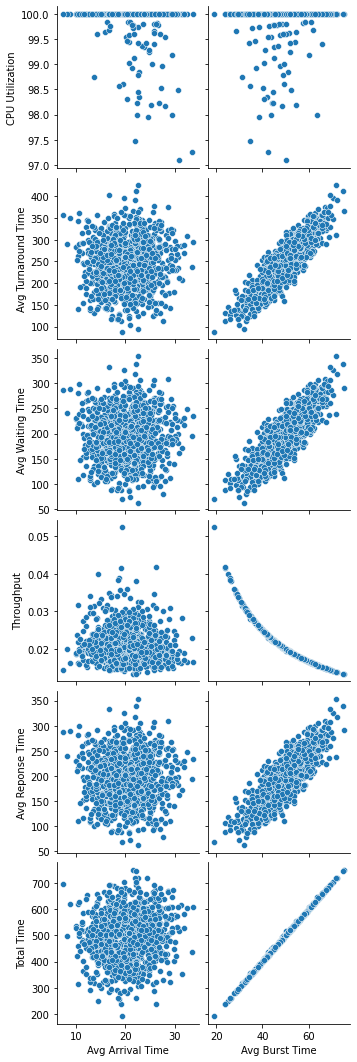

Scatter Plots and fits:


In [ ]:
# Performing the simulation
results, success_rate = Simulator(printSamples = False)

print("Algorithms success rate is: " + str(success_rate))
print("======================================================================================")
if success_rate>0:
  printSimulationResults(results)

---
## <center>**6. Comparison Plots and Results Interpretation**



Looking closely at each of these objects we can conclude the insights below:

---

1. **Statistical characteristics of the simulations samples:**
  * **Standard Deviation:** Recall that a standard deviation is a measure of how dispersed the data is in relation to the mean. A standard deviation close to zero indicates that data points are **close to the mean**, whereas a high or low standard deviation indicates data points are respectively above or below the mean.
  
    So we have:

Close to the mean | Spread out 
-------------    | -------------|
CPU Utilization  | Avg Turnaround Time
Throughput.      | Avg Waiting Time
Avg Arrival Time | Avg Response Time
Avg Burst Time   | Total Time	

---

2. **Pearson correlation coefficient:**
Recall that Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables. It gives information about the magnitude of the association, or 
correlation, as well as the direction of the relationship.
Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.

 * We can see that there are **no correlations** between the **average arrival time** and the goal parameters.

 * Correlation with **average burst time**:

Highly Positive Correlated | Highly Negative Correlated |
-------------    | -------------    |
Avg Turnaround Time  | Throughput  | 
Avg Waiting Time | 
Avg Response Time | 

---

3. **Correlograms:** A correlogram (also called Auto Correlation Function ACF Plot or Autocorrelation plot) is a visual way to show serial correlation in data that changes over time.

 * We can see that there are **no correlations** between the **average arrival time** and the goal parameters.

 * Correlation with **average burst time**:

Increasing Linear   | Decreasing nonLinear
-------------    | --------------    |
Avg Turnaround Time         | Throughput
Avg Waiting Time | 
Avg Response Time | 
Total Time	|

---

4. **Scatter Plots and fits:** A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

 * We can see that there are **no correlations** between the **average arrival time** and the goal parameters.

 * Correlation with **average burst time**:

Increasing Linear   | Decreasing nonLinear
-------------    | --------------    |
Avg Turnaround Time         | Throughput
Avg Waiting Time | 
Avg Response Time | 
Total Time	|

---

Therefore the by **increasing** the **average burst time**, the below parameters would **increase linearly**:
* Avg Turnaround Time
* Avg Waiting Time 
* Avg Response Time 
* Total Time	
But **Throughput** would **decrease** and the larger the **average burst time** gets, the change would be **less significant**. 

---
## <center>**7. UI / Try It Yourself! 🤓**



Here you can change any parameters you'd like and check out the results of the simulation for yourself!

In [ ]:
#@title #**Try the simulations for yourself!** 🤓
#@markdown ####Please change any paramethers you'd like and then run BOTH this and the next cell.
#@markdown ---

Algorithm_Name = "FCFS"      #@param ['FCFS']
#@markdown Do you want to print each sample and its results? 
#@markdown (If yes, it would take a couple of minutes so consider limiting the simulation's time!)
Print_Samples = True #@param {type:"boolean"} 

#@markdown ---
Number_of_Sampels =  10#@param {type: "integer"}
Timelimit_of_Simulation =  120#@param {type: "integer"}
#@markdown ---
TimeLimit_of_Each_Sample =   20#@param {type: "integer"}
Iterations_Limit_of_Each_Sample =   100#@param {type: "integer"}
#@markdown ---
Number_of_Processes =       15#@param {type: "integer"}
#@markdown ---
Minimum_Arrival_time =      2#@param {type: "integer"}
Maximum_Arrival_time =     50#@param {type: "integer"}
#@markdown ---
Minimum_Burst_time = 1       #@param {type: "integer"}
Maximum_Burst_time = 200     #@param {type: "integer"}
#@markdown ---

,Process,Arrival Time,Burst Time,Exit Time,Turn Around Time,Waiting Time
0,P4,0,110,110,110,0
1,P15,5,74,184,179,105
2,P7,7,8,192,185,177
3,P13,9,127,319,310,183
4,P10,13,130,449,436,306
5,P1,16,78,527,511,433
6,P6,19,130,657,638,508
7,P12,21,3,660,639,636
8,P3,23,110,770,747,637
9,P14,26,124,894,868,744


____________________________________________________________________________
CPU Utilization:  100.0
Average Turnaround Time:  735.8
Average Waiting Time:  634.4666666666667
Throughput:  0.009868421052631578
Average Reponse Time:  634.4666666666667
Total Time:  1520
Average Arrival Time:  20.866666666666667
Average Burst Time:  101.33333333333333


,Process,Arrival Time,Burst Time,Exit Time,Turn Around Time,Waiting Time
0,P4,0,42,42,42,0
1,P11,0,42,84,84,42
2,P14,0,192,276,276,84
3,P6,13,26,302,289,263
4,P7,21,93,395,374,281
5,P2,24,159,554,530,371
6,P3,28,17,571,543,526
7,P1,32,136,707,675,539
8,P13,32,39,746,714,675
9,P10,35,156,902,867,711


____________________________________________________________________________
CPU Utilization:  100.0
Average Turnaround Time:  715.2
Average Waiting Time:  609.3333333333334
Throughput:  0.009445843828715366
Average Reponse Time:  609.3333333333334
Total Time:  1588
Average Arrival Time:  26.2
Average Burst Time:  105.86666666666666


,Process,Arrival Time,Burst Time,Exit Time,Turn Around Time,Waiting Time
0,P6,0,113,113,113,0
1,P3,1,150,263,262,112
2,P13,2,53,316,314,261
3,P5,12,79,395,383,304
4,P4,19,154,549,530,376
5,P10,21,163,712,691,528
6,P7,31,23,735,704,681
7,P11,32,181,916,884,703
8,P2,34,35,951,917,882
9,P12,34,32,983,949,917


____________________________________________________________________________
CPU Utilization:  100.0
Average Turnaround Time:  743.6666666666666
Average Waiting Time:  651.6666666666666
Throughput:  0.010869565217391304
Average Reponse Time:  651.6666666666666
Total Time:  1380
Average Arrival Time:  25.666666666666668
Average Burst Time:  92


,Process,Arrival Time,Burst Time,Exit Time,Turn Around Time,Waiting Time
0,P2,0,195,195,195,0
1,P9,1,122,317,316,194
2,P12,1,160,477,476,316
3,P1,2,34,511,509,475
4,P4,2,188,699,697,509
5,P6,7,192,891,884,692
6,P11,13,19,910,897,878
7,P7,15,31,941,926,895
8,P14,22,129,1070,1048,919
9,P13,28,13,1083,1055,1042


____________________________________________________________________________
CPU Utilization:  100.0
Average Turnaround Time:  972.5333333333333
Average Waiting Time:  853.9333333333333
Throughput:  0.008431703204047217
Average Reponse Time:  853.9333333333333
Total Time:  1779
Average Arrival Time:  17.8
Average Burst Time:  118.6


,Process,Arrival Time,Burst Time,Exit Time,Turn Around Time,Waiting Time
0,P5,0,18,18,18,0
1,P13,0,93,111,111,18
2,P10,4,25,136,132,107
3,P2,11,21,157,146,125
4,P15,11,81,238,227,146
5,P1,15,78,316,301,223
6,P8,15,98,414,399,301
7,P6,24,65,479,455,390
8,P11,24,130,609,585,455
9,P14,25,27,636,611,584


____________________________________________________________________________
CPU Utilization:  100.0
Average Turnaround Time:  538.2
Average Waiting Time:  450.06666666666666
Throughput:  0.0113464447806354
Average Reponse Time:  450.06666666666666
Total Time:  1322
Average Arrival Time:  19.333333333333332
Average Burst Time:  88.13333333333334


,Process,Arrival Time,Burst Time,Exit Time,Turn Around Time,Waiting Time
0,P6,0,76,76,76,0
1,P11,1,116,192,191,75
2,P8,4,14,206,202,188
3,P7,7,23,229,222,199
4,P15,8,136,365,357,221
5,P14,9,159,524,515,356
6,P4,10,160,684,674,514
7,P3,12,128,812,800,672
8,P5,12,150,962,950,800
9,P9,14,92,1054,1040,948


____________________________________________________________________________
CPU Utilization:  100.0
Average Turnaround Time:  749.1333333333333
Average Waiting Time:  657.7333333333333
Throughput:  0.010940919037199124
Average Reponse Time:  657.7333333333333
Total Time:  1371
Average Arrival Time:  12
Average Burst Time:  91.4


,Process,Arrival Time,Burst Time,Exit Time,Turn Around Time,Waiting Time
0,P2,0,128,128,128,0
1,P11,3,99,227,224,125
2,P14,6,123,350,344,221
3,P15,8,163,513,505,342
4,P3,12,126,639,627,501
5,P13,13,15,654,641,626
6,P5,24,163,817,793,630
7,P6,27,129,946,919,790
8,P9,34,67,1013,979,912
9,P7,38,118,1131,1093,975


____________________________________________________________________________
CPU Utilization:  100.0
Average Turnaround Time:  901.0666666666667
Average Waiting Time:  786.3333333333334
Throughput:  0.008715862870424172
Average Reponse Time:  786.3333333333334
Total Time:  1721
Average Arrival Time:  25
Average Burst Time:  114.73333333333333


,Process,Arrival Time,Burst Time,Exit Time,Turn Around Time,Waiting Time
0,P4,0,50,50,50,0
1,P10,4,37,87,83,46
2,P1,6,35,122,116,81
3,P7,8,46,168,160,114
4,P14,10,43,211,201,158
5,P12,13,40,251,238,198
6,P3,14,164,415,401,237
7,P2,16,130,545,529,399
8,P5,16,42,587,571,529
9,P13,21,1,588,567,566


____________________________________________________________________________
CPU Utilization:  100.0
Average Turnaround Time:  460.8
Average Waiting Time:  394.3333333333333
Throughput:  0.015045135406218655
Average Reponse Time:  394.3333333333333
Total Time:  997
Average Arrival Time:  18.066666666666666
Average Burst Time:  66.46666666666667


,Process,Arrival Time,Burst Time,Exit Time,Turn Around Time,Waiting Time
0,P12,0,123,123,123,0
1,P10,1,73,196,195,122
2,P8,2,48,244,242,194
3,P5,4,141,385,381,240
4,P15,4,119,504,500,381
5,P7,9,168,672,663,495
6,P11,13,59,731,718,659
7,P3,15,58,789,774,716
8,P1,21,107,896,875,768
9,P6,24,138,1034,1010,872


____________________________________________________________________________
CPU Utilization:  100.0
Average Turnaround Time:  813.2666666666667
Average Waiting Time:  708.8
Throughput:  0.009572431397574984
Average Reponse Time:  708.8
Total Time:  1567
Average Arrival Time:  16.8
Average Burst Time:  104.46666666666667


,Process,Arrival Time,Burst Time,Exit Time,Turn Around Time,Waiting Time
0,P12,0,53,53,53,0
1,P10,9,100,153,144,44
2,P14,10,13,166,156,143
3,P4,11,69,235,224,155
4,P13,13,152,387,374,222
5,P8,14,169,556,542,373
6,P6,15,129,685,670,541
7,P3,20,40,725,705,665
8,P15,22,151,876,854,703
9,P7,25,48,924,899,851


____________________________________________________________________________
CPU Utilization:  100.0
Average Turnaround Time:  717.2
Average Waiting Time:  615.2
Throughput:  0.00980392156862745
Average Reponse Time:  615.2
Total Time:  1530
Average Arrival Time:  22.466666666666665
Average Burst Time:  102
___________________________________________
ATTENTION: The simulation is over!
Algorithms success rate is: 100.0
Results of the simulation:


,CPU Utilization,Avg Turnaround Time,Avg Waiting Time,Throughput,Avg Reponse Time,Total Time,Avg Arrival Time,Avg Burst Time
0,100.0,735.800000,634.466667,0.009868,634.466667,1520,20.866667,101.333333
1,100.0,715.200000,609.333333,0.009446,609.333333,1588,26.200000,105.866667
2,100.0,743.666667,651.666667,0.010870,651.666667,1380,25.666667,92.000000
3,100.0,972.533333,853.933333,0.008432,853.933333,1779,17.800000,118.600000
4,100.0,538.200000,450.066667,0.011346,450.066667,1322,19.333333,88.133333
5,100.0,749.133333,657.733333,0.010941,657.733333,1371,12.000000,91.400000
6,100.0,901.066667,786.333333,0.008716,786.333333,1721,25.000000,114.733333
7,100.0,460.800000,394.333333,0.015045,394.333333,997,18.066667,66.466667
8,100.0,813.266667,708.800000,0.009572,708.800000,1567,16.800000,104.466667
9,100.0,717.200000,615.200000,0.009804,615.200000,1530,22.466667,102.000000


Statistical characteristics of the simulations samples:


,CPU Utilization,Avg Turnaround Time,Avg Waiting Time,Throughput,Avg Reponse Time,Total Time,Avg Arrival Time,Avg Burst Time
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,100.0,734.686667,636.186667,0.010404,636.186667,1477.500000,20.420000,98.500000
std,0.0,150.932352,137.530767,0.001884,137.530767,223.826942,4.520139,14.921796
min,100.0,460.800000,394.333333,0.008432,394.333333,997.000000,12.000000,66.466667
25%,100.0,715.700000,610.800000,0.009477,610.800000,1373.250000,17.866667,91.550000
50%,100.0,739.733333,643.066667,0.009836,643.066667,1525.000000,20.100000,101.666667
75%,100.0,797.233333,696.033333,0.010923,696.033333,1582.750000,24.366667,105.516667
max,100.0,972.533333,853.933333,0.015045,853.933333,1779.000000,26.200000,118.600000


Pearson correlation coefficient:


,CPU Utilization,Avg Turnaround Time,Avg Waiting Time,Throughput,Avg Reponse Time,Total Time,Avg Arrival Time,Avg Burst Time
CPU Utilization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg Turnaround Time,NaN,1.000000,0.998963,-0.872019,0.998963,0.907680,0.079805,0.907680
Avg Waiting Time,NaN,0.998963,1.000000,-0.850634,1.000000,0.887631,0.058372,0.887631
Throughput,NaN,-0.872019,-0.850634,1.000000,-0.850634,-0.980280,-0.268633,-0.980280
Avg Reponse Time,NaN,0.998963,1.000000,-0.850634,1.000000,0.887631,0.058372,0.887631
Total Time,NaN,0.907680,0.887631,-0.980280,0.887631,1.000000,0.269216,1.000000
Avg Arrival Time,NaN,0.079805,0.058372,-0.268633,0.058372,0.269216,1.000000,0.269216
Avg Burst Time,NaN,0.907680,0.887631,-0.980280,0.887631,1.000000,0.269216,1.000000


None
Correlogram:


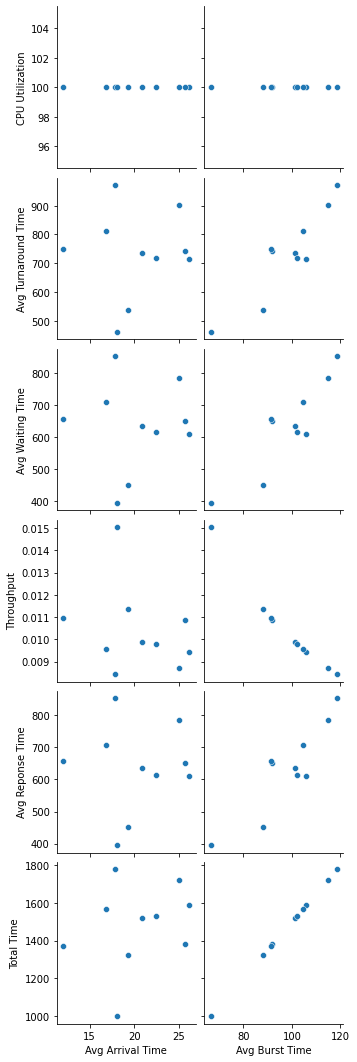

Scatter Plots and fits:


In [ ]:
# Performing the simulation
results, success_rate = Simulator(Algorithm_Name, Number_of_Sampels, Timelimit_of_Simulation, Number_of_Processes,  
                  Minimum_Arrival_time, Maximum_Arrival_time, 
                  Minimum_Burst_time, Maximum_Burst_time, Print_Samples,
                  TimeLimit_of_Each_Sample, Iterations_Limit_of_Each_Sample)

print("Algorithms success rate is: " + str(success_rate))
print("======================================================================================")
if success_rate>0:
  printSimulationResults(results)

---
## <center>**8. Conclusion**


1. by **increasing** the **average burst time**, the below parameters would **increase linearly**:

 * Avg Turnaround Time
 * Avg Waiting Time 
 * Avg Response Time 
 * Total Time	

 But **Throughput** would **decrease** and the larger the **average burst time** gets, the change would be **less significant**. Therefore **FCFS** is **better** for a **small burst time**. 

2. **average arrival time** has no effect.

3. If there are **gaps** between the previous process exit time and the next process arrival time, the CPU would be free for a while and hence the **CPU Utilization would decrease**.

---

**First Come First Serve Algorithm (FCFS):**

Advantages       | Disadvantages
-------------    | -------------
Simple | Non-Preemptive
User-Friendly | Long Average Waiting Time
Easy to Implement | Lower Device Utilizatio
First Come First Served | Favors CPU Over I/O
  | Not Ideal for Time-Sharing Systems

---

**Usage of FCFS Scheduling Algorithm in a Situations:**

**Situation:** The incoming processes are **short** and there is no need for the processes to execute in a specific order.(non-primitive)

 * In this case, **FCFS** works best because the processes are short which means that no process will wait for a longer time. When each process is executed one by one, every process will be executed eventually.
 
 ---


---
## <center>**9. References**

1.   [Lesson 21: Run Test and Test for Randomness](https://online.stat.psu.edu/stat415/book/export/html/837)
2.   [Linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator)
3. [Scheduler Harvard Education](https://www.read.seas.harvard.edu/~kohler/class/05s-osp/notes/notes5.html)
4. [FCFS Scheduling Algorithm: What is, Example Program](https://www.guru99.com/fcfs-scheduling.html)






---